<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
ind = data[data['TotalSpent']==' '].index

In [7]:
data['TotalSpent'].iloc[ind] = 0

C:\Users\KOSTJA\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
data['TotalSpent'].iloc[ind] 
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], downcast='float')

Пропущенных значений нет

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

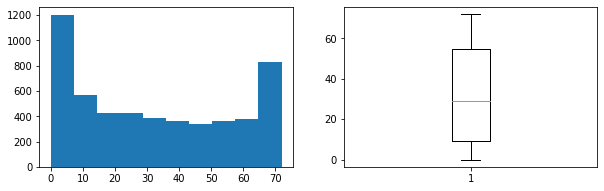

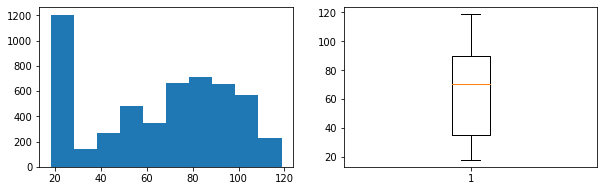

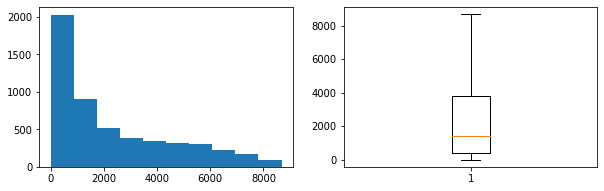

In [9]:
import seaborn as sns
for i in num_cols:
    k=1
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(3, 2, 1*k)
    ax2 = fig.add_subplot(3, 2, 2*k)
    ax1.hist(data[i])
    ax2.boxplot(data[i])
    k+=1

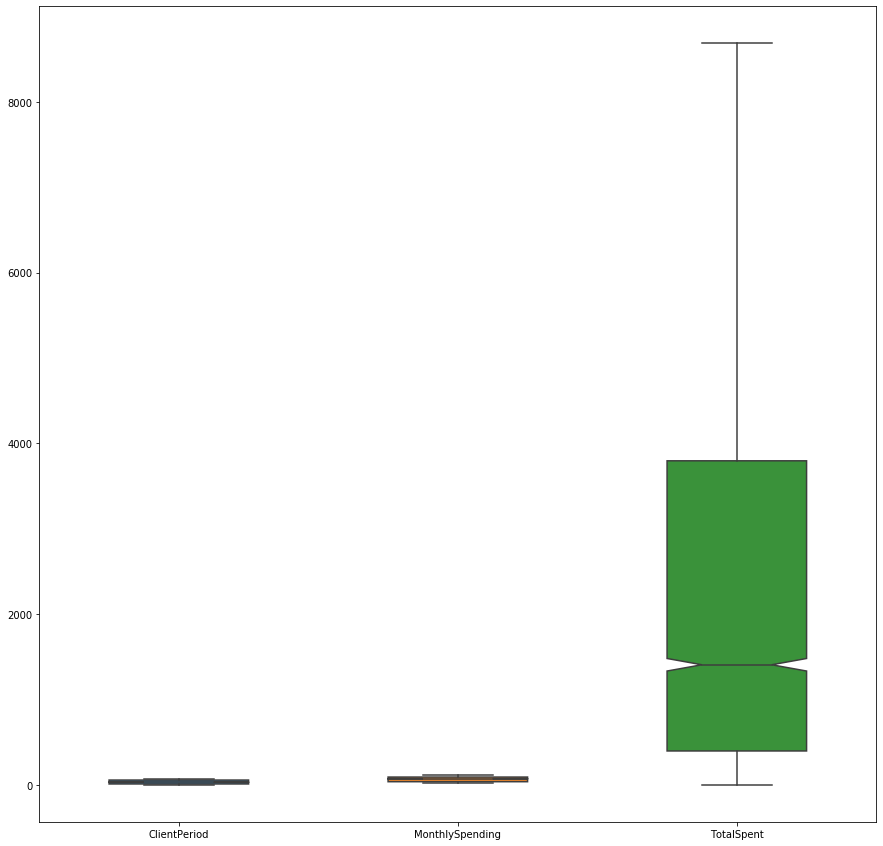

In [10]:
fig = plt.figure(figsize =(15,15))
sns.boxplot(data = data[num_cols],notch = True,linewidth = 1.5, width = 0.50)

признаки необходимо отмаштабировать

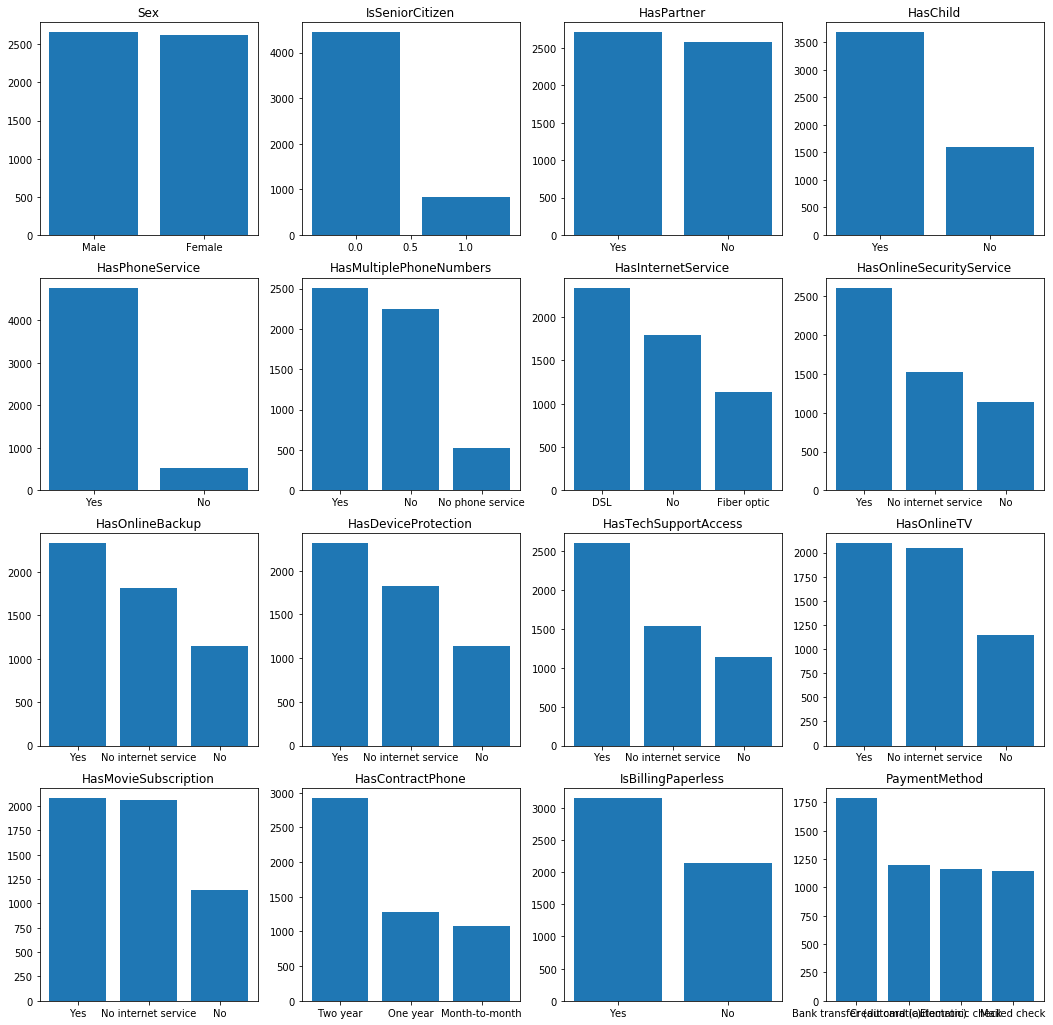

In [11]:
k=0
fig = plt.figure(figsize=(18,18))
ax=[0]*len(cat_cols)
for i in cat_cols:


    ax = fig.add_subplot(4, 4, 1+k)
    
    plt.title(i)
    ax.bar(list(set(data[i])),data[i].value_counts())
    k+=1

<BarContainer object of 2 artists>

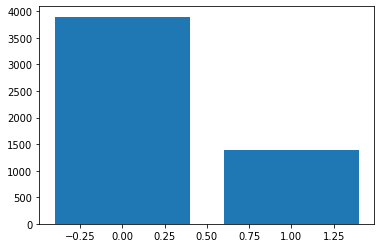

In [12]:
plt.bar(list(set(data[target_col])),data[target_col].value_counts())


In [13]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.349976,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.199951,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.900002,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.000000,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.450195,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.150002,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.449951,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.049999,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.250000,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


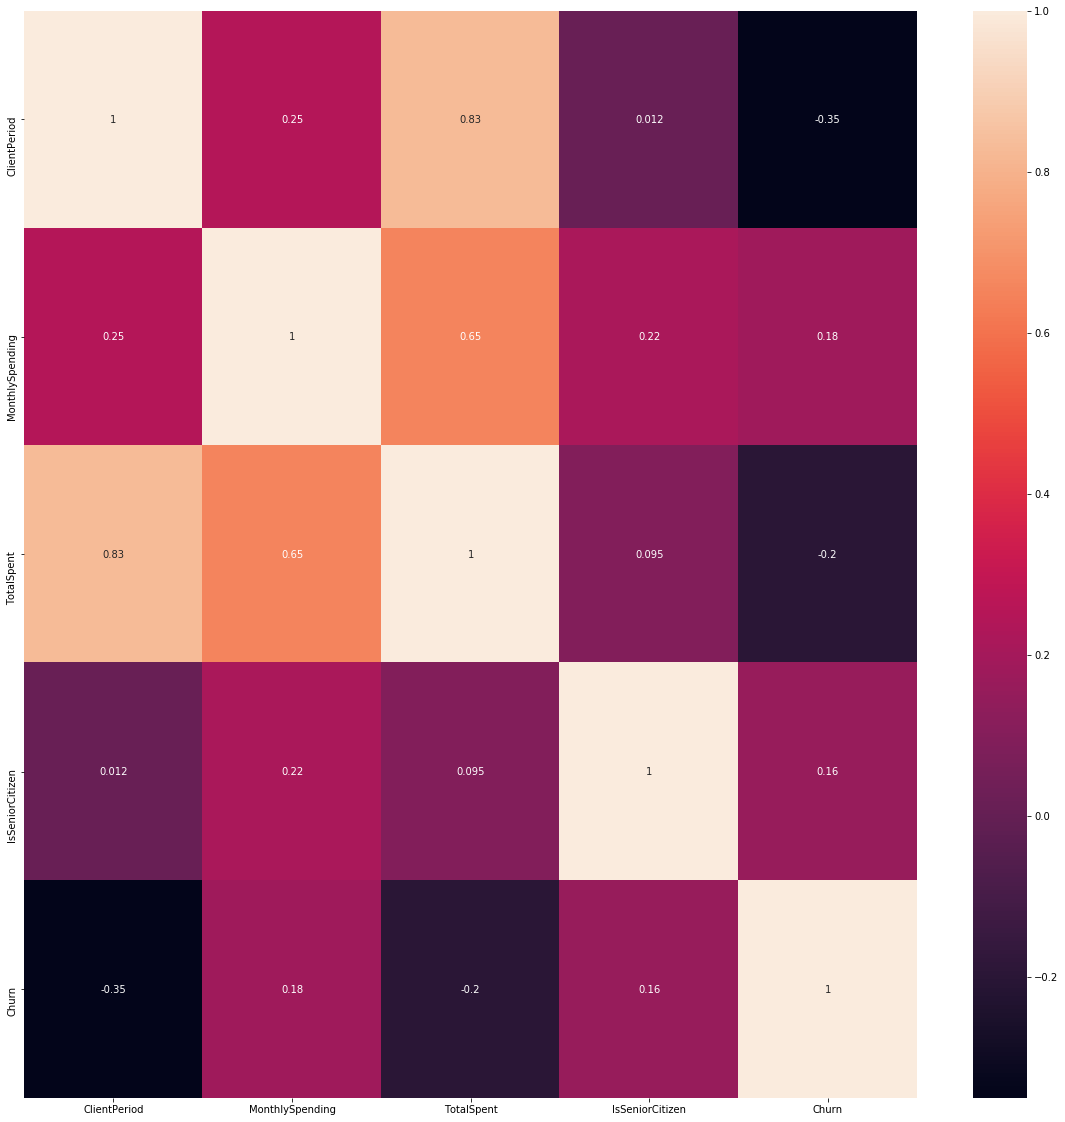

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

Некоторые переменные очень сильно коррелируют 

Классы не сбалансированы

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [15]:
df = data.copy()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [17]:
scl =StandardScaler()
scl.fit(data[num_cols])
data[num_cols] =scl.transform(data[num_cols])

In [18]:
enc =OneHotEncoder()
code = enc.fit_transform(data[cat_cols])
code = pd.DataFrame(code.toarray())
data = pd.concat([data,code],axis=1)

In [19]:
data.drop(cat_cols,inplace=True, axis=1)

In [20]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Churn,0,1,2,3,4,5,...,33,34,35,36,37,38,39,40,41,42
0,0.920767,-1.505447,-0.555852,0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.613288,-1.294998,-0.183039,0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.279005,0.363737,-0.974768,1,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.016173,0.476418,0.124519,0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.124450,1.667856,1.970600,0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.972013,0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,0.717084,-0.678565,-0.043651,0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,-1.279005,-0.327265,-0.983957,0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,-0.138382,0.367051,-0.031838,0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
x_train,x_test, y_train, y_test = train_test_split(data.drop(['Churn'],axis=1),data[['Churn']], random_state=32)

In [22]:
clf =  LogisticRegressionCV(cv=5, scoring='roc_auc', refit=True, random_state=12).fit(x_train,y_train)


C:\Users\KOSTJA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
clf.coef_

array([[-1.71536635, -1.7232939 ,  0.95910889, -0.05321406, -0.05827078,
        -0.19613612,  0.08465128, -0.0653761 , -0.04610875,  0.02269021,
        -0.13417505, -0.2632637 ,  0.15177885, -0.22204675, -0.2632637 ,
         0.3738256 , -0.87303722,  1.17497745, -0.41342508,  0.26100884,
        -0.41342508,  0.04093139,  0.14848951, -0.41342508,  0.15345072,
         0.03308481, -0.41342508,  0.26885542,  0.20124023, -0.41342508,
         0.1007    , -0.1546879 , -0.41342508,  0.45662813, -0.23062478,
        -0.41342508,  0.53256501,  0.58796929,  0.05884592, -0.75830006,
        -0.27947422,  0.16798937, -0.03550575, -0.29227736,  0.26176746,
        -0.0454692 ]])

In [24]:
clf.scores_

{1: array([[0.83964244, 0.84287788, 0.84857724, 0.85132321, 0.85101626,
         0.85050191, 0.84997926, 0.84994608, 0.84994608, 0.84993778],
        [0.82710766, 0.83127104, 0.83794407, 0.84374455, 0.84790792,
         0.84912951, 0.84975277, 0.84976108, 0.84976108, 0.84976108],
        [0.82912287, 0.83071841, 0.83031952, 0.82929738, 0.83021149,
         0.83104251, 0.83131674, 0.83154942, 0.83154942, 0.83154942],
        [0.83904101, 0.84080276, 0.84273902, 0.8432958 , 0.84597997,
         0.84704367, 0.8469855 , 0.84696057, 0.84696057, 0.84696057],
        [0.83083891, 0.83516849, 0.84260606, 0.84640379, 0.84784144,
         0.84750073, 0.84744256, 0.84751735, 0.84751735, 0.84751735]])}

In [25]:
y_pred = clf.predict(x_test)
roc_auc_score(y_test, y_pred)

0.7031920499887073

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
X = data.drop(['Churn'],axis=1)
y = data['Churn']


In [27]:
!pip install catboost

In [28]:
import lightgbm as lgb
x_train,x_test, y_train, y_test = train_test_split(X, y, random_state=37)
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(data.values)
def error(model, x_train = x_train, y_train=y_train):
    Kf = KFold(5, random_state= 42)
    err = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=Kf)
    
    return(err.mean())
model = lgb.LGBMClassifier(num_leaves=25, random_state= 27,
                          max_depth =15, learning_rate=0.08,
                           reg_lambda =1,
                           n_estimators =800, subsample_for_bin=200,
                           reg_alpha= 3,
                           min_child_samples=50
                         #  ,objective='binary'
                          )

#model.fit(x_train,y_train)

In [29]:
x_train,x_test, y_train, y_test = train_test_split(df.drop(['Churn'],axis=1),df['Churn'], random_state=37)

In [111]:
X=df.drop(['Churn'],axis=1)
y = df['Churn']

In [112]:
from catboost import CatBoostClassifier, Pool

In [113]:
model =  CatBoostClassifier(cat_features=cat_cols, custom_metric='AUC',# loss_function= 'CrossEntropy',
                            n_estimators=700, random_state=42,
                            l2_leaf_reg=6,max_depth=8, #eta=0.08,
                            min_data_in_leaf=15 )
#cat_features=cat_cols, custom_metric='AUC',# loss_function= 'CrossEntropy',
#                            n_estimators=700, random_state=42,
 #                           l2_leaf_reg=15,max_depth=8, #eta=0.08,
  #                          min_data_in_leaf=15

In [116]:
model.fit(x_train,y_train)
y_pred = model.predict(x_train)
roc_auc_score(y_train, y_pred)
y_pred = model.predict(x_test)
roc_auc_score(y_pred, y_test)


0:	learn: 0.6720808	total: 37.5ms	remaining: 26.2s
1:	learn: 0.6542534	total: 63.5ms	remaining: 22.2s
2:	learn: 0.6385776	total: 76.4ms	remaining: 17.7s
3:	learn: 0.6236926	total: 178ms	remaining: 31s
4:	learn: 0.6087182	total: 216ms	remaining: 30s
5:	learn: 0.5961355	total: 253ms	remaining: 29.3s
6:	learn: 0.5831540	total: 287ms	remaining: 28.4s
7:	learn: 0.5719814	total: 334ms	remaining: 28.9s
8:	learn: 0.5642104	total: 341ms	remaining: 26.2s
9:	learn: 0.5552170	total: 363ms	remaining: 25s
10:	learn: 0.5462786	total: 385ms	remaining: 24.1s
11:	learn: 0.5369596	total: 417ms	remaining: 23.9s
12:	learn: 0.5282960	total: 467ms	remaining: 24.7s
13:	learn: 0.5200146	total: 516ms	remaining: 25.3s
14:	learn: 0.5138410	total: 543ms	remaining: 24.8s
15:	learn: 0.5070791	total: 579ms	remaining: 24.8s
16:	learn: 0.5014585	total: 607ms	remaining: 24.4s
17:	learn: 0.4959985	total: 632ms	remaining: 23.9s
18:	learn: 0.4905542	total: 665ms	remaining: 23.9s
19:	learn: 0.4865756	total: 691ms	remaining:

0.8289847670648843

In [118]:

y_pred = model.predict(x_train)
roc_auc_score(y_pred, y_train)

0.8135192063316948

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [119]:
best_model = model

In [120]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:,1] # / best_model.predict(X_test)
#submission.to_csv('./my_submission.csv')
def write_to_submission_file(predictions, out_file='Submission.csv', columns=['Id', 'Churn']):
    predicted_df = pd.DataFrame([])
    predicted_df['Id'] = range(len(predictions))
    predicted_df['Out'] = predictions

    predicted_df.columns = columns
    predicted_df.to_csv('./my_submission.csv', index=False)
    print(predicted_df)
write_to_submission_file(submission['Churn'] )

        Id     Churn
0        0  0.026992
1        1  0.779403
2        2  0.532372
3        3  0.020854
4        4  0.002053
...    ...       ...
1756  1756  0.146507
1757  1757  0.007331
1758  1758  0.842054
1759  1759  0.407700
1760  1760  0.006883

[1761 rows x 2 columns]


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.